In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
sns.set()

attendance_df = pd.read_csv('../data/matches_transformed.csv', sep=',')

## Features - Target - Split
X = attendance_df.drop('attendance', axis=1)
y = attendance_df['attendance']

## Test - Train - Split

X_train, X_test, y_train, y_test, = train_test_split(
    X,
    y,
    train_size=2/3, random_state=123)

In [7]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [8]:
## benötigte Klassen importieren
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import time

models = [
    LinearRegression(),
    Lasso(alpha=0.5011872336272735),
    Ridge(alpha=0.006579332246575682),
    KNeighborsRegressor(p = 1, n_neighbors=5),
    DecisionTreeRegressor(max_depth=4),
    RandomForestRegressor(n_estimators= 200, random_state = 123),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    HistGradientBoostingRegressor(),
    # SVR(max_iter=1000),
    MLPRegressor(max_iter=10000, random_state=123)
]

In [9]:
## vorbereiten des Loops
regressors = []
scores = []
mses = []
used_times = []


## print output header
print('Regressor                        r2          mse           time')
print('=========================================================================')

Regressor                        r2          mse           time


In [10]:
for model in models:
    name = model.__class__.__name__
    regressors.append(name)

    #scaled
    start_time = time.time()
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    y_pred = model.predict(X_test_sc)
    score_mse = mean_squared_error(y_test, y_pred)
    used_time = time.time() - start_time


    scores.append(score)
    mses.append(score_mse)
    used_times.append(used_time)

    print('%-30s   %0.4f       %2.3f   %0.4f ' %(name, score, score_mse, used_time)) ## console output

LinearRegression                 0.8271       8807477.118   0.0404 
Lasso                            0.8271       8805568.307   0.0273 
Ridge                            0.8271       8807453.482   0.0056 
KNeighborsRegressor              0.7929       10549991.934   0.1270 
DecisionTreeRegressor            0.7631       12067828.611   0.0082 
RandomForestRegressor            0.9041       4883472.254   1.5377 
AdaBoostRegressor                0.7047       15044547.984   0.1358 
GradientBoostingRegressor        0.8882       5695463.019   0.2016 
HistGradientBoostingRegressor    0.9051       4833854.192   1.5307 
MLPRegressor                     0.8637       6942125.036   174.5690 


/Users/cyrillbader/miniforge3/envs/pml-attendance-analysis/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


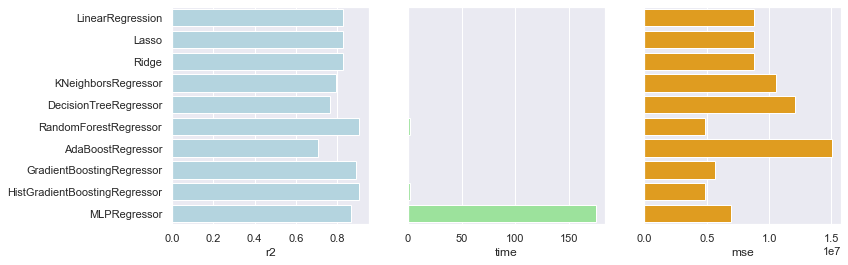

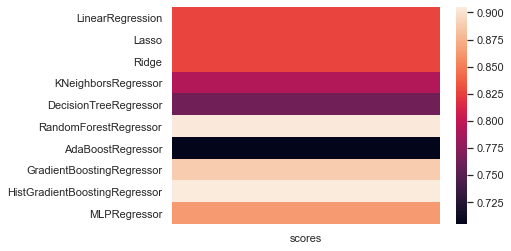

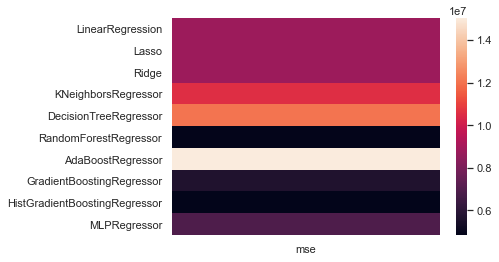

In [11]:
        ## Visualisieren der Resultate
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=False)
ax = sns.barplot(x=scores, y=regressors, color='lightblue', ax=axes[0])
ax.set_xlabel('r2')
ax = sns.barplot(x=used_times, y=regressors, color='lightgreen', ax=axes[1])
ax.set_yticklabels(['']* len(regressors))
ax.set_xlabel('time')
ax = sns.barplot(x=mses, y=regressors, color='orange', ax=axes[2])
ax.set_yticklabels(['']* len(regressors))
ax.set_xlabel('mse')
plt.show()

## Resultate visualisieren

scores_heatmap = pd.DataFrame(
    {'scores': scores,
    }, index=regressors)

sns.heatmap(scores_heatmap)
plt.show()

mse_heatmap = pd.DataFrame(
    {'mse': mses,
    }, index=regressors)
sns.heatmap(mse_heatmap)
plt.show()